<a href="https://colab.research.google.com/github/lalith0203/CarPrice_Analysis/blob/main/CarPrice_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (1).csv


In [ ]:
df_main = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df_main.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df_main.shape

(4340, 8)

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df_main.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df_main.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
df_main['Age'] = 2020 - df_main['year']
df_main.drop('year',axis=1,inplace = True)

In [ ]:
df_main.rename(columns = {'selling_Price':'selling_price(lacs)','fuel':'fuel_type','owner':'Past_Owners'},inplace = True)

In [ ]:
df_main.columns

Index(['name', 'selling_price', 'km_driven', 'fuel_type', 'seller_type',
       'transmission', 'Past_Owners', 'Age'],
      dtype='object')

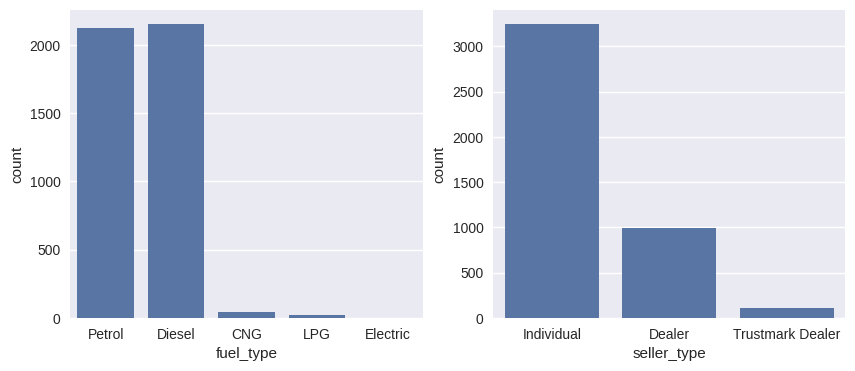

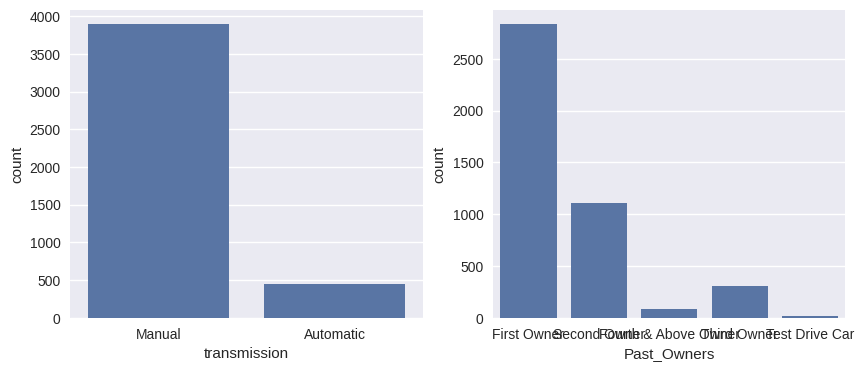

In [ ]:
cat_cols = ['fuel_type','seller_type','transmission','Past_Owners']
i=0
while i < 4:
 fig = plt.figure(figsize=[10,4])
 plt.subplot(1,2,1)
 sns.countplot(x=cat_cols[i], data=df_main)
 i += 1
 plt.subplot(1,2,2)
 sns.countplot(x=cat_cols[i], data=df_main)
 i += 1
 plt.show()

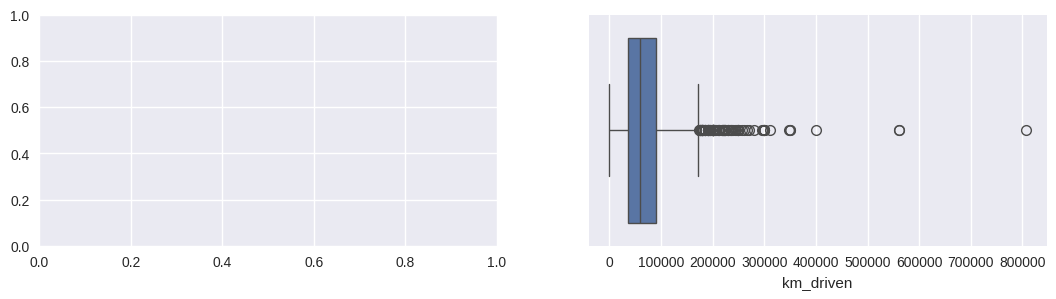

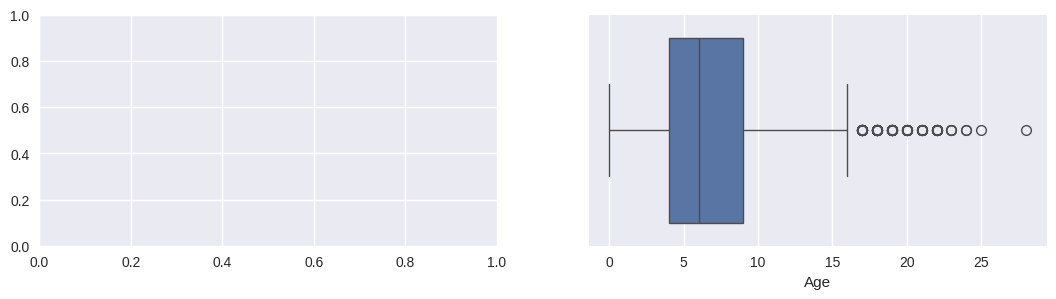

In [ ]:
num_cols = ['selling_price(lacs)','km_driven','fule_type','Age']
i=0
while i < 4:
 fig = plt.figure(figsize=[13,3])
 plt.subplot(1,2,1)
 i += 1
 plt.subplot(1,2,2)
 sns.boxplot(x=num_cols[i], data=df_main)
 i += 1
 plt.show()

In [ ]:
df_main.drop(labels='name',axis= 1, inplace = True)

In [ ]:
df_main = pd.get_dummies(data = df_main,drop_first=True)

In [ ]:
y = df_main['km_driven']
X = df_main.drop('km_driven',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3472, 13)
x test:  (868, 13)
y train:  (3472,)
y test:  (868,)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
CV = []
R2_train = []
R2_test = []
def car_pred_model(model,model_name):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    plt.show()

Train R2-score : 0.33
Test R2-score : 0.29
Train CV scores : [0.40975264 0.37541798 0.24833978 0.28703478 0.34550649]
Train CV mean : 0.33


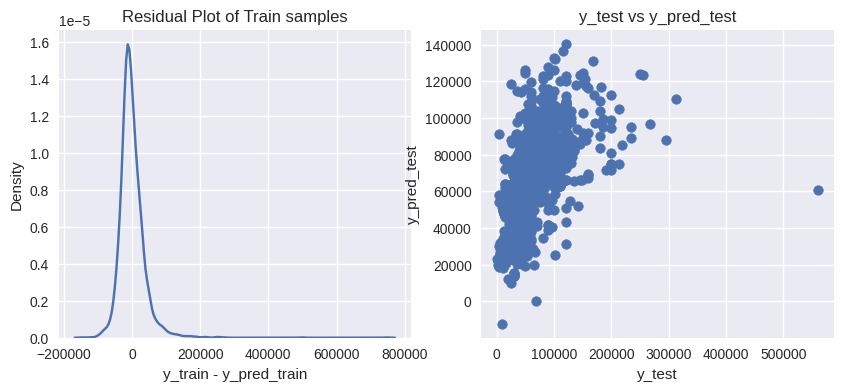

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")